In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def f(x, y, z, t):
    return (np.exp(-x) + np.exp(-y) + np.exp(-z)) * np.exp(t)

In [ ]:
f(0.5,0.0,0.0,0.01)

np.float64(2.632726728352752)

Using data file: ../output/3D/result/Advection_solution.txt
(10000, 4)


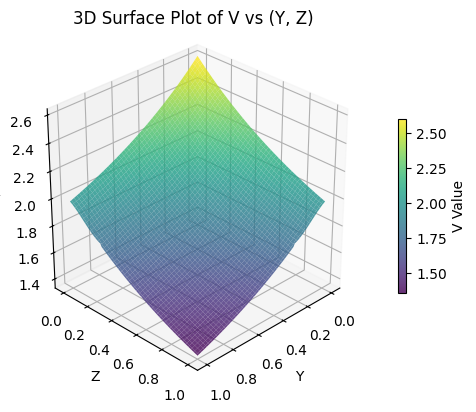

In [ ]:
fig = plt.figure(figsize=[6.5,4])
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])

filename = "../output/3D/result/Advection_solution.txt"
print(f"Using data file: {filename}")
data = np.loadtxt(filename, skiprows = 1)
print (data.shape)
X = data[:,0]
Y = data[:,1]
Z = data[:,2]
V = data[:,3]

# scatter = ax.scatter(Y, Z, V, c=V, cmap='viridis', marker='o')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('V')

Nx = 100
Ny = 100

Ygrid = np.zeros((Ny,Nx))
Zgrid = np.zeros((Ny,Nx))
Vgrid = np.zeros((Ny,Nx))
Vgrid_exact = np.zeros((Ny,Nx))

for j in range(0,Ny):
	for i in range (0,Nx):
		Ygrid[j,i] = Y[i+j*Nx]
		Zgrid[j,i] = Z[i+j*Nx]
		Vgrid[j,i] = V[i+j*Nx]
		Vgrid_exact[j,i] = f(0.5, Y[i+j*Nx], Z[i+j*Nx], 0.01)

surf = ax.plot_surface(Ygrid, Zgrid, Vgrid, cmap='viridis', 
                       edgecolor='none', alpha=0.8)

# surf_exact = ax.plot_surface(Ygrid, Zgrid, Vgrid_exact, 
#                        edgecolor='none', alpha=0.8)

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('V')

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
cbar.set_label('V Value')

ax.set_title('3D Surface Plot of V vs (Y, Z)')

plt.tight_layout()
ax.view_init(elev=30, azim=45)
plt.savefig('Adv__t001_x05_Slice.pdf')
plt.show()